# Part 2: Homography

### For this part, you must write your own code for computing the homography matrix and transforming an image.

1. Download h1.jpg and h2.jpg. Write a code to show a GUI (graphical user interface) where the user can click 4 points on an image. Let the user to choose 4 points on h1.jpg and 4 points on h2.jpg

In [15]:
import cv2
h1 = cv2.imread('h1.jpg')
h2 = cv2.imread('h2.jpg')
h1 = cv2.cvtColor(h1, cv2.COLOR_BGR2RGB)
h2 = cv2.cvtColor(h2, cv2.COLOR_BGR2RGB)

In [16]:
def mouse_click(event, x, y,flags,points):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((y,x))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        cv2.putText(image, str(x) + ',' + str(y), (x,y), font, 2, (0, 0, 255), 2)
        cv2.imshow('click four homography points',image)


In [34]:
image = h1.copy()
points_1 = []
cv2.startWindowThread()
cv2.namedWindow('click four homography points', cv2.WINDOW_NORMAL)
cv2.resizeWindow('click four homography points', 600,600)
cv2.imshow('click four homography points', image)
cv2.setMouseCallback('click four homography points', mouse_click, points_1)
cv2.waitKey(0) # 
  
cv2.destroyAllWindows() 
cv2.waitKey(1)
print(points_1)

[(54, 26), (1168, 26), (1162, 1168), (30, 1168)]


In [35]:
image = h2.copy()
points_2 = []
cv2.startWindowThread()
cv2.namedWindow('click four homography points', cv2.WINDOW_NORMAL)
cv2.resizeWindow('click four homography points', 600,600)
cv2.imshow('click four homography points', image)
cv2.setMouseCallback('click four homography points', mouse_click, points_2)
cv2.waitKey(0) 
   
cv2.destroyAllWindows()
cv2.waitKey(1)
print(points_2)

[(209, 16), (549, 367), (291, 843), (7, 469)]


2. Compute the homography matrix from h1.jpg to h2.jpg, and show the homography matrix. Use the homography matrix to tranform h1.jpg to h2.jpg, and show the result:

Compute the homography matrix:

In [36]:
# Import the required modules
import numpy as np

def homography(points_1, points_2):
    points_1 = np.column_stack((points_1, np.ones(len(points_1))))
    points_2 = np.column_stack((points_2, np.ones(len(points_2))))

    A = np.zeros((2*len(points_1),9))
    for i in range(len(points_1)):
        x1, y1, z1 = points_1[i]
        x2, y2, z2 = points_2[i]
        A[2*i] = [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2, -x2]
        A[2*i + 1] = [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2, -y2]

    U, D, V_T = np.linalg.svd(A)
    h = V_T[-1]
    H = h.reshape((3,3))
    H = H / H[2,2]
    return H

# Compute the homography matrix using the function defined above
H = homography(points_1, points_2)

# Print the homography matrix
print('Homography matrix:')
print(H)


Homography matrix:
[[ 2.45931058e-01 -1.70466212e-01  1.99449907e+02]
 [ 2.75082903e-01  4.44936111e-01 -1.04765525e+01]
 [-1.06102646e-04  9.11918686e-05  1.00000000e+00]]


Tranform h1.jpg to h2.jpg:

In [37]:
import matplotlib.pyplot as plt


def tranform(input_1, homography_matrix, input_2):
    #transform input_1 image to input_2 image using homography_matrix

    height, width = input_1.shape[:2]
    output_shape = (input_2.shape[0], input_2.shape[1], 3)   #(height, width, RGB)
    output = np.ones(output_shape, dtype=input_1.dtype) 

    for x in range(height):
        for y in range(width):
            i, j, k = np.dot(homography_matrix, [x, y, 1]) 
            i = int(i/k)
            j = int(j/k)
            if 0 <= i < output_shape[0] and 0 <= j < output_shape[1]:
                output[i, j] = input_1[x, y]
    return output

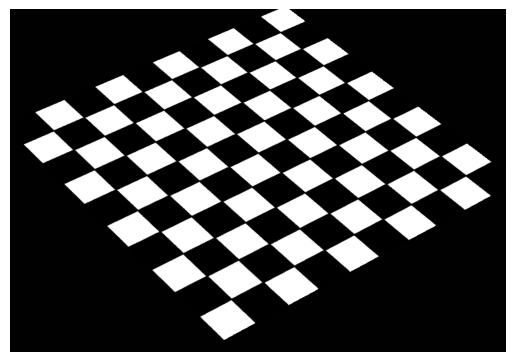

In [38]:
import matplotlib.pyplot as plt

h1_transformed = tranform(h1, H, h2)
plt.imshow(h1_transformed)
plt.axis('off')
plt.show()
    

3. Compute the homography matrix from h2.jpg to h1.jpg, and show the homography matrix.

In [39]:
H2 = homography(points_2, points_1)

# Print the homography matrix
print('Homography matrix:')
print(H)

Homography matrix:
[[ 2.45931058e-01 -1.70466212e-01  1.99449907e+02]
 [ 2.75082903e-01  4.44936111e-01 -1.04765525e+01]
 [-1.06102646e-04  9.11918686e-05  1.00000000e+00]]


4. Use the second homography matrix to tranform h2.jpg to h1.jpg, and show the result:

In [40]:
def tranform2(input_1, homography_matrix, input_2):
    #transform input_1 image to input_2 image using homography_matrix

    height, width = input_1.shape[:2]
    output_shape = (input_2.shape[0], input_2.shape[1], 3)   #(height, width, RGB)
    output = np.ones(output_shape, dtype=input_1.dtype) 
    
    for x in range(height):
        for y in range(width):
            i, j, k = np.dot(homography_matrix, [x, y, 1]) 
            i = int(i/(2*k) + output_shape[0]/4)
            j = int(j/(2*k) + output_shape[1]/4)
            if 0 <= i < output_shape[0] and 0 <= j < output_shape[1]:
                output[i, j] = input_1[x, y]
    return output

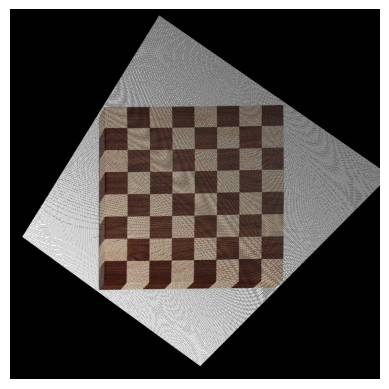

In [41]:
h2_transformed = tranform2(h2, H2, h1)
plt.imshow(h2_transformed)
plt.axis('off')
plt.show()

In [42]:
# a new method
def tranform2(input_1, homography_matrix, input_2):
    #transform input_1 image to input_2 image using homography_matrix

    height, width = input_1.shape[:2]

    output_shape = (input_2.shape[0], input_2.shape[1], 3)   #(height, width, RGB)
    output = np.ones(output_shape, dtype=input_1.dtype) 

    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            x, y, z = np.dot(np.linalg.inv(homography_matrix), [i, j, 1])
            x = int(2*(x/z) - output_shape[0]/5)
            y = int(2*(y/z) - output_shape[1]/3)
            if 0<=x<height and 0<=y<width:
                output[i , j] = input_1[x,y]
    return output

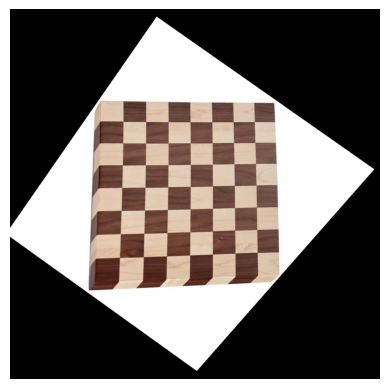

In [43]:
h2_transformed = tranform2(h2, H2, h1)
plt.imshow(h2_transformed)
plt.axis('off')
plt.show()


5. Download the two images below: simpsons.jpg and bus.jpg. Ask the user to select the points for transforming the simpsons image to the advertisement area of the bus. Compute the homography, transform the image, and show the transformation result, similar to:

In [28]:
# load the images
simpsons = cv2.imread('simpsons.jpg')
bus = cv2.imread('bus.jpg')
simpsons = cv2.cvtColor(simpsons, cv2.COLOR_BGR2RGB)
bus = cv2.cvtColor(bus, cv2.COLOR_BGR2RGB)

In [29]:
image = simpsons.copy()
simp_points = []
cv2.startWindowThread()
cv2.namedWindow('click four homography points', cv2.WINDOW_NORMAL)
cv2.resizeWindow('click four homography points', 600,600)
cv2.imshow('click four homography points', image)
cv2.setMouseCallback('click four homography points', mouse_click, simp_points)
cv2.waitKey(0) 
    
cv2.destroyAllWindows() 
cv2.waitKey(1)
print(simp_points)

[(12, 20), (1475, 10), (1402, 982), (28, 980)]


In [30]:
image = bus.copy()
bus_points = []
cv2.startWindowThread()
cv2.namedWindow('click four homography points', cv2.WINDOW_NORMAL)
cv2.resizeWindow('click four homography points', 600,600)
cv2.imshow('click four homography points', image)
cv2.setMouseCallback('click four homography points', mouse_click, bus_points)
cv2.waitKey(0) 
cv2.destroyAllWindows() 
cv2.waitKey(1)
print(bus_points)

[(212, 590), (513, 601), (463, 803), (230, 792)]


In [32]:
H3 = homography(simp_points, bus_points)

print('Homography matrix:')
print(H3)


Homography matrix:
[[ 2.05947184e-01  6.61375893e-02  2.09139390e+02]
 [ 8.83954475e-03  3.85909285e-01  5.84773709e+02]
 [-7.38583577e-07  2.20610048e-04  1.00000000e+00]]


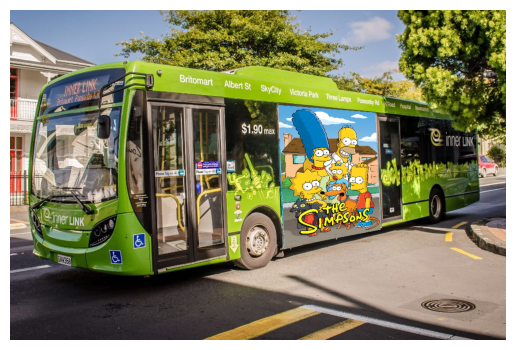

In [33]:
height, width = simpsons.shape[:2]

for x in range(height):
    for y in range(width):
        i, j, k = np.dot(H3, [x, y, 1]) 
        i = int(i/k)
        j = int(j/k)
        if 0 <= i < bus.shape[0] and 0 <= j < bus.shape[1]:
            bus[i, j] = simpsons[x, y]

plt.imshow(bus)
plt.axis('off')
plt.show()